In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../data/raw/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.shape

(100000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

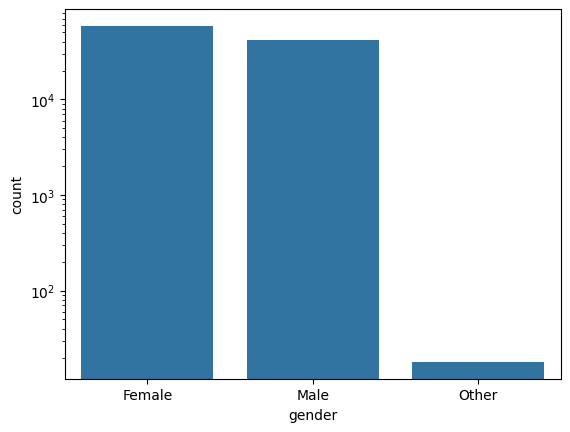

In [10]:
sns.countplot(data= df, x = 'gender')
plt.yscale('log')

In [11]:
df = df[df['gender']!='Other']

In [16]:
df.gender.replace({'Male':1,'Female':0},inplace=True)

C:\Users\Asghar Qambar Rizvi\AppData\Local\Temp\ipykernel_14160\730083376.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.gender.replace({'Male':1,'Female':0},inplace=True)


In [17]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [18]:
df['gender'] = df.gender.astype(int)

In [19]:
df.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [37]:
df = df[df['smoking_history'] != 'No Info']

In [45]:
df.smoking_history.unique()

array(['never', 'current', 'former', 'ever', 'not current'], dtype=object)

In [38]:
dummies = pd.get_dummies(df.smoking_history,drop_first=True)
dummies

,ever,former,never,not current
0,False,False,True,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
...,...,...,...,...
99992,False,False,True,False
99993,False,False,True,False
99997,False,True,False,False
99998,False,False,True,False


In [39]:
new_df = pd.concat([df,dummies],axis='columns')

In [40]:
new_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,ever,former,never,not current
0,0,80.0,0,1,never,25.19,6.6,140,0,False,False,True,False
2,1,28.0,0,0,never,27.32,5.7,158,0,False,False,True,False
3,0,36.0,0,0,current,23.45,5.0,155,0,False,False,False,False
4,1,76.0,1,1,current,20.14,4.8,155,0,False,False,False,False
5,0,20.0,0,0,never,27.32,6.6,85,0,False,False,True,False


In [41]:
new_df.drop(columns=['smoking_history'],inplace=True)

In [42]:
new_df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,ever,former,never,not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,True,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,False,False,False,False
5,0,20.0,0,0,27.32,6.6,85,0,False,False,True,False


<Axes: xlabel='smoking_history', ylabel='count'>

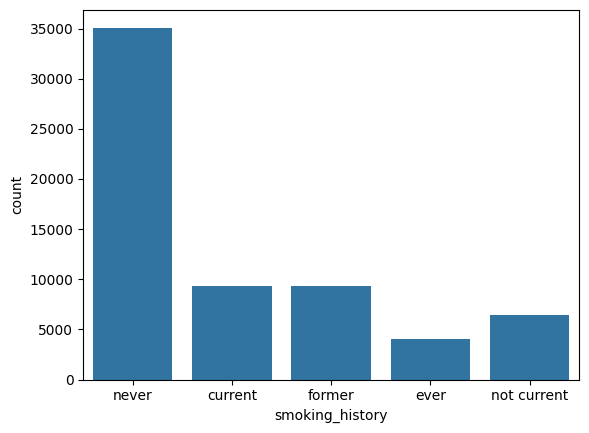

In [43]:
sns.countplot(data=df, x= 'smoking_history')

In [46]:

new_df.shape

(64172, 12)

In [48]:
new_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'ever', 'former', 'never',
       'not current'],
      dtype='object')

In [49]:
x = new_df.drop(columns=['diabetes'])

In [50]:
y = new_df.diabetes

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [58]:
from sklearn.metrics import accuracy_score, precision_score

In [59]:
def get_clfs_results(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_predict = clf.predict(x_test)
    acc = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test, y_predict)
    return acc, precision

In [60]:
accuracy = []
precision =[]
for keys, items in clfs.items():
    a,p = get_clfs_results(items,x_train,x_test,y_train,y_test)
    accuracy.append(a)
    precision.append(p)

c:\Users\Asghar Qambar Rizvi\OneDrive\Desktop\Doctor_project\DSENV\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asghar Qambar Rizvi\OneDrive\Desktop\Doctor_project\DSENV\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [61]:
results = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy, 'Precision': precision}).sort_values(by='Accuracy',ascending=False)

In [62]:
results

,Algorithm,Accuracy,Precision
6,AdaBoost,0.966732,0.978175
3,DT,0.965251,1.000000
9,GBDT,0.965251,1.000000
5,RF,0.963927,0.954902
7,BgC,0.962291,0.919519
8,ETC,0.960810,0.911874
4,LR,0.951850,0.865658
1,KN,0.942735,0.858862
0,SVC,0.891624,0.000000
2,NB,0.862252,0.359013


In [63]:
new_df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,ever,former,never,not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,True,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,False,False,False,False
5,0,20.0,0,0,27.32,6.6,85,0,False,False,True,False


In [64]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [98]:
list = [x for x in new_df.drop(columns=['diabetes']).columns]

In [104]:
def predict_diabetes(gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history):
    df = np.zeros(len(list))
    df[0] = gender
    df[1] = age
    df[2] = hypertension
    df[3] = heart_disease
    df[4] = bmi
    df[5] = HbA1c_level
    df[6] = blood_glucose_level
    try:
        index = list.index(smoking_history)
        df[index] = 1
    except ValueError:
        df[7] = 0
        
    return dtc.predict([df])
    

In [105]:
# print(new_df.iloc[0].values)
predict_diabetes(0,80.0,0,1,25.19,6.6,140,'never')

c:\Users\Asghar Qambar Rizvi\OneDrive\Desktop\Doctor_project\DSENV\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [106]:
predict_diabetes(1,76.0,1,1,20.14,4.8,155,'current')

c:\Users\Asghar Qambar Rizvi\OneDrive\Desktop\Doctor_project\DSENV\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [107]:
import pickle
with open('../models/diabetes.model.pickle','wb') as f:
    pickle.dump(dtc,f)

In [113]:
col = {
    'columns' : [x for x in new_df.drop(columns=['diabetes']).columns]
}

import json 
with open("../src/features/diabetes.json",'w') as f:
    f.write(json.dumps(list)) 